# Survey Insights of Developers using StackOverflow 2019 Survey
This notebook is an attempt to figure out the trends of Developers as shown in StackOverflow 2019 survey. I am mainly concerned about trends for Female Developer and other IT professional (and I also want to look the trends for Pakistani Female Developers).

So far I chalked out following questions that I find would be interesting to find answers for from the available dataset:

- How many IT professional took part in the survey? How many Pakistani IT professional took part in the survey
- How many of them were Men, Women and others? which one was in the majority of participating in the Survey?
- Is there any profession in which women have more representation than men (based on this survey)?
- What is the distribution of women across different years since coding? how is it different from men?


The dataset used has 2 parts:

- survey-results-schema.csv file: contains code book for columns in "survey-results-public.csv" file, it shows detailed description of the question asked.

- survey-results-public.csv: contains actual survey result

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import defaultdict

In [2]:
# Data Gathering
schema = pd.read_csv('./survey_results_schema.csv')
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [3]:
# Data Gathering
survey = pd.read_csv('./survey_results_public.csv')
survey.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
# Assessing column headers of the dataset
survey_columns = list(survey.columns)
print(survey_columns)

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisi

### Question 1: How many Pakistani IT professional took part in the survey?
Lets first find out if there are any missing values in Country column? This is necessary to be able to figure out how much our insight is accurate with respect to the overall data points available.

In [5]:
# Assessing the data
print("{} people in the survey didn't disclose the Country they live".format(survey.Country.isnull().sum()))
survey_pk = survey.loc[survey['Country'] == 'Pakistan'] #dataframe that contains only survey from Pakistani IT professional
print("Total number of countries from which IT professional took part: ", survey.Country.nunique())
print("Total number of people who took part in the survey: ", len(survey))
print("Number of Pakistani IT professional who took part in the survey: {} which is {} % of the total survey" .format(len(survey_pk), round(len(survey_pk)/len(survey)*100,2) ))

132 people in the survey didn't disclose the Country they live
Total number of countries from which IT professional took part:  179
Total number of people who took part in the survey:  88883
Number of Pakistani IT professional who took part in the survey: 923 which is 1.04 % of the total survey


### Question 2: How many of them were Men, Women and others? which one was in the majority of participating in the Survey?
Lets first find how many in the survey refrained from disclosing their identities. Also how many of these are from Pakistan. 

In [6]:
# Assessing the data
total_gender_anon = survey.Gender.isnull().sum()
pk_gender_anon = survey_pk.Gender.isnull().sum()
print("{} people in the survey didn't disclose their gender orientation in the overall survey".format(total_gender_anon))
print("{} Pakistani people in the survey didn't disclose their gender orientation".format(pk_gender_anon))
print("This means that out of {} people that didn't disclose their identities {} % are from Pakistan".format(
    total_gender_anon, round(pk_gender_anon*100/total_gender_anon, 2)))
print("This also mean that {} people from Pakistan didn't disclose their identities out of {} which makes up {} % of the total that took part in survey from pk".
      format(pk_gender_anon ,len(survey_pk),round(pk_gender_anon*100/len(survey_pk), 2) ))

3477 people in the survey didn't disclose their gender orientation in the overall survey
49 Pakistani people in the survey didn't disclose their gender orientation
This means that out of 3477 people that didn't disclose their identities 1.41 % are from Pakistan
This also mean that 49 people from Pakistan didn't disclose their identities out of 923 which makes up 5.31 % of the total that took part in survey from pk


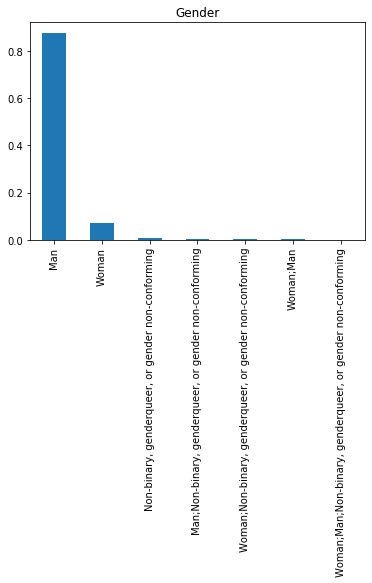

In [7]:
#visualising the data
(survey.Gender.value_counts()/survey.shape[0]).plot(kind="bar");
plt.title("Gender");

This needs a bit of data cleaning as some people not just identified them self as Male or Female, but have provided mutliple identities this needs to be handled carefully, so I am first extracting the distinct gender identities available.

In [8]:
def distinct_values_column(df, column):
    ''' Returns distinct values in a dataframe columns
    Args:
    df: dataframe 
    column: the column in the dataframe that will be used to get unique values
    Output: Set of distinct values in dataframe's column
    '''
    survey_distinct = pd.DataFrame(survey[column].value_counts())
    distinct_set = {distinct_value_each for distinct_value in list(survey_distinct.index) for distinct_value_each in distinct_value.split(';')}
    print("Distinct values present in the survey: ")
    print(distinct_set)
    return distinct_set

In [9]:
#Cleaning the data
gender_distinct = distinct_values_column(survey, 'Gender')

Distinct values present in the survey: 
{'Woman', 'Non-binary, genderqueer, or gender non-conforming', 'Man'}


Defining functions to plot the gender distribution present in a dataframe as well as giving a table of counts for each gender

In [10]:
def clean_and_plot(data,column, distinct_values, title='Gender Distribution in Survey', plot=True):
    ''' Returns count of distinct values in a dataframe
    Args:
    data: dataframe containing column for cleaning and plotting 
    column: column of dataframe that needs cleaning and plotting
    distinct_values: set of distinct values in a dataframe column used for data cleaning
    title: title for the plot
    plot: flag to indicate if plot is needed
    Output:
    Dataframe of distinct values and count
    Plot visualising count for each distinct values in the dataframe column 
    '''
    
    df = data[column].value_counts().reset_index()
    df.rename(columns={'index': column, column: 'count'}, inplace=True)
    df_1 = total_count(df, column, 'count', distinct_values)

    df_1.set_index(column, inplace=True)
    if plot:
        #(df_1/df_1.sum()).plot(kind='bar', legend=None);
        ax = (df_1).plot(kind='bar', legend=None, figsize=(7, 7));
        rects = ax.patches
        # Make some labels.
        labels = df_1['count'].tolist()

        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height , label,
                    ha='center', va='bottom')
        plt.title(title)
        plt.show()
    
    return df_1

def total_count(df, col1, col2, look_for):
    ''' Returns clean dataframe that has distinct values in first column and count of these distinct values in second column
    Args:
    df: Dataframe
    col1: column that needs cleaning to have only distinct categories
    col2: count of each values in col1
    look_for: set of distinct values that needs to be searched in col1
    Output:
    A clean dataframe  with distinct values and their count
    '''
    
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the  type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


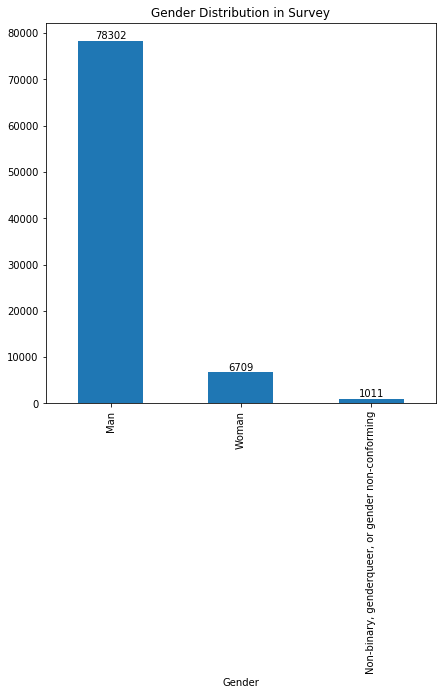

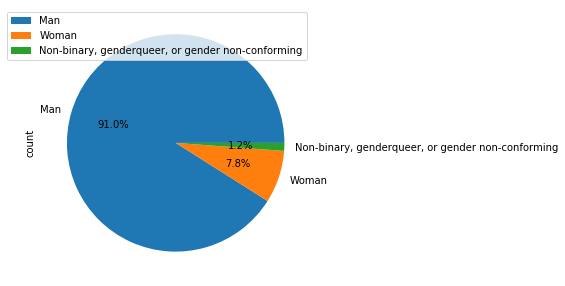

In [11]:
# visualising the gender distribution in the overall survey
props_df = clean_and_plot(survey, 'Gender',gender_distinct)
plot_df = props_df.plot.pie(y='count', autopct='%1.1f%%', figsize=(5, 5))
props_df
plot_df

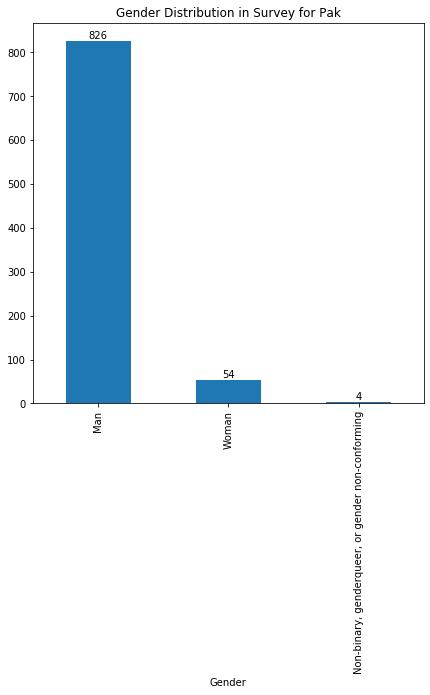

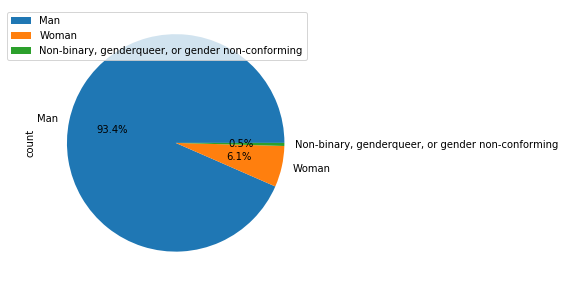

In [12]:
# visualising the gender distribution in the survey of Pakistani IT professionals
props_df_pk = clean_and_plot(survey_pk, 'Gender',gender_distinct, title="Gender Distribution in Survey for Pak")
plot_pk = props_df_pk.plot.pie(y='count',autopct='%1.1f%%', figsize=(5, 5))
plot_pk

In [13]:
props_df_pk

,count
Gender,
Man,826
Woman,54
"Non-binary, genderqueer, or gender non-conforming",4


###  Analysis from the above visualisation
- We can see from the above chart and table that majority people from Pakistan that took part in the survey identitifed themselves as either Male or Female and 49% didn't disclose their identities. This means  the data from the Survey will be not that useful in identifying much about gender disparity in PK IT industry.
- Also those who do reported their gender from PK shows that majority of them are Men (93.4 % to be exact) and merely 6.1% of them are women (this indicates 2 possibilities, there are not many women in tech industry in PK and/or if there are more women in tech industry then they are not active on platform like StackOverflow to make their voices heard)

####   Since there are only 54 Women from Pakistan that took part in the survey (excluding those who refrained from disclosing their identities), there is not much analysis that I can do to see gender disparity in the PK tech industry from this surey, so from this point forward, I will first see gender disparity in the overall Survey from all countries and will try to see what insight I can extract from the 54 PK female datapoints that I have available.

###  Question 3: Is there any profession in which women have more representation than men (based on this survey)?

Removing rows with no gender specification

In [14]:
# Data Cleaning
survey_notna = survey[survey['Gender'].notna()]
survey_female = survey_notna[survey_notna.Gender.str.contains('Woman')]
survey_female.head()
distinct_values_column(survey_female, 'Gender')
print("Unique Values in the dataframe that has all the rows where Gender column shows Female as  a value")
print(survey_female.Gender.unique())


Distinct values present in the survey: 
{'Woman', 'Non-binary, genderqueer, or gender non-conforming', 'Man'}
Unique Values in the dataframe that has all the rows where Gender column shows Female as  a value
['Woman' 'Woman;Non-binary, genderqueer, or gender non-conforming'
 'Woman;Man;Non-binary, genderqueer, or gender non-conforming' 'Woman;Man']


In [15]:
# Data Cleaning
survey_male = survey_notna[survey_notna.Gender.str.contains('Man')]
print("Unique Values in the dataframe that has all the rows where Gender column shows male as  a value")
print(survey_male.Gender.unique())


Unique Values in the dataframe that has all the rows where Gender column shows male as  a value
['Man' 'Woman;Man;Non-binary, genderqueer, or gender non-conforming'
 'Woman;Man' 'Man;Non-binary, genderqueer, or gender non-conforming']


So far the way I classified gender distribution is that if a datapoint mentions "Male, Female" I add them in both the categories, now I want to see the difference in representation of Male Vs. Female specifically in different professions so I am making 2 separate dataframes for the datapoint that only mentions either Male or Female (I know filtering out only datapoints that classify as either Male or Female is not ideal but I want to see the difference between only these 2, to see how pronounced it is for females of the industry)

In [16]:
# Data Cleaning
survey_female_distinct = survey_notna[survey_notna.Gender =='Woman']
survey_male_distinct = survey_notna[survey_notna.Gender =='Man']
print("Total datapoints that specified just 'Woman' as gender ", len(survey_female_distinct))
print("Total datapoints that specified just 'Man' as gender ", len(survey_male_distinct))

Total datapoints that specified just 'Woman' as gender  6344
Total datapoints that specified just 'Man' as gender  77919


### Analysis of Gender Disparity in Dev Roles
For analysing gender disparity I am going to break up the survey dataframe into 2 dataframes, one with Gender= 'Man' and the other where Gender = 'Woman'

In [17]:
# Analysing the data 
total_pro_anon = survey.DevType.isnull().sum()
print("There are {} people who didn't report their profession ".format(total_pro_anon))

There are 7548 people who didn't report their profession 


Distinct values present in the survey: 
{'Engineering manager', 'Developer, front-end', 'Database administrator', 'Developer, game or graphics', 'Data scientist or machine learning specialist', 'Engineer, site reliability', 'DevOps specialist', 'Student', 'Educator', 'Developer, desktop or enterprise applications', 'Academic researcher', 'Product manager', 'Engineer, data', 'Developer, mobile', 'Designer', 'Marketing or sales professional', 'Data or business analyst', 'Developer, QA or test', 'Developer, full-stack', 'Developer, back-end', 'Senior executive/VP', 'System administrator', 'Scientist', 'Developer, embedded applications or devices'}


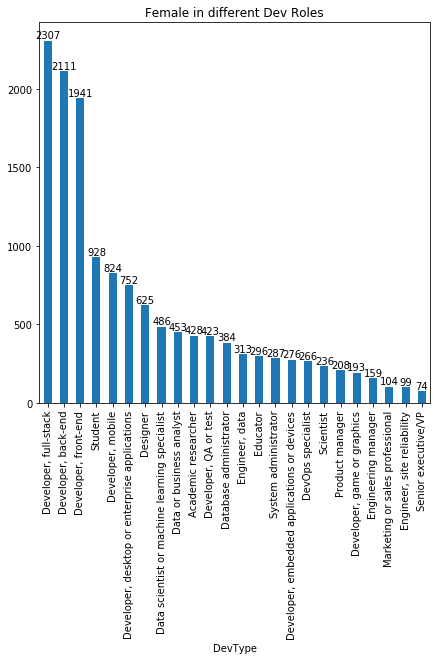

,count,Gender
DevType,,
"Developer, full-stack",2307,Woman
"Developer, back-end",2111,Woman
"Developer, front-end",1941,Woman
Student,928,Woman
"Developer, mobile",824,Woman
"Developer, desktop or enterprise applications",752,Woman
Designer,625,Woman
Data scientist or machine learning specialist,486,Woman
Data or business analyst,453,Woman


In [18]:
# Cleaning the data
survey_f_dev_notna = survey_female_distinct[survey_female_distinct.DevType.notna()]
# Visualising the data
dev_type_distinct = distinct_values_column(survey, 'DevType')
female_dev_count = clean_and_plot(survey_f_dev_notna,'DevType',dev_type_distinct, title='Female in different Dev Roles', plot=True)
female_dev_count['Gender'] = 'Woman'
female_dev_count

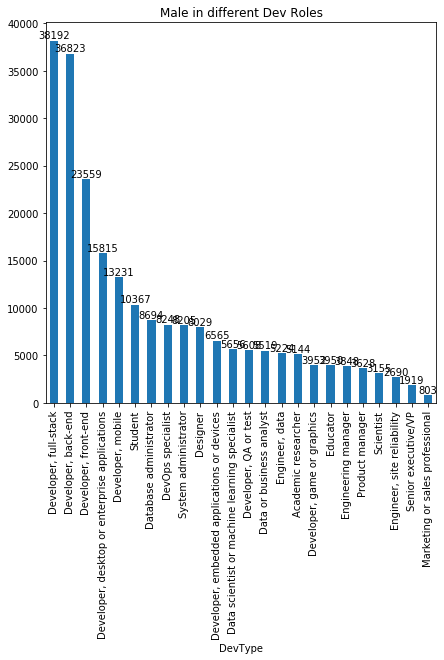

,count,Gender
DevType,,
"Developer, full-stack",38192,Man
"Developer, back-end",36823,Man
"Developer, front-end",23559,Man
"Developer, desktop or enterprise applications",15815,Man
"Developer, mobile",13231,Man
Student,10367,Man
Database administrator,8694,Man
DevOps specialist,8248,Man
System administrator,8205,Man


In [19]:
#cleaning the data
survey_m_dev_notna = survey_male_distinct[survey_male_distinct.DevType.notna()]
# visualising the data
male_dev_count = clean_and_plot(survey_m_dev_notna,'DevType',dev_type_distinct, title='Male in different Dev Roles', plot=True)
male_dev_count['Gender'] = "Man"
male_dev_count

In [20]:
def compare_malefemale_disparity(female_table, male_table, title = "Gender Representation in Different Roles" ):
    '''Plot  a common value (count) between 2 dataframes as bar plot
    Args:
    female_table: Dataframe 1
    male_table: Dataframe 2
    title: title of the graph
    '''
    ind = np.arange(len(female_table.index))
    width = 0.27
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, female_table['count'].tolist(), width, color='r')
    rects2 = ax.bar(ind+width, male_table['count'].tolist(), width, color='g')
    ax.set_title(title)
    ax.set_ylabel('Number of People (m/f)')
    ax.set_xticks(ind+width)
    ax.set_xticklabels((male_table.index.tolist()) , rotation= 90)
    ax.legend( (rects1[0], rects2[0]), ('Female', 'Male') )
    def autolabel(rects):
        '''Helper function for labelling each bar'''
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    plt.show()
    


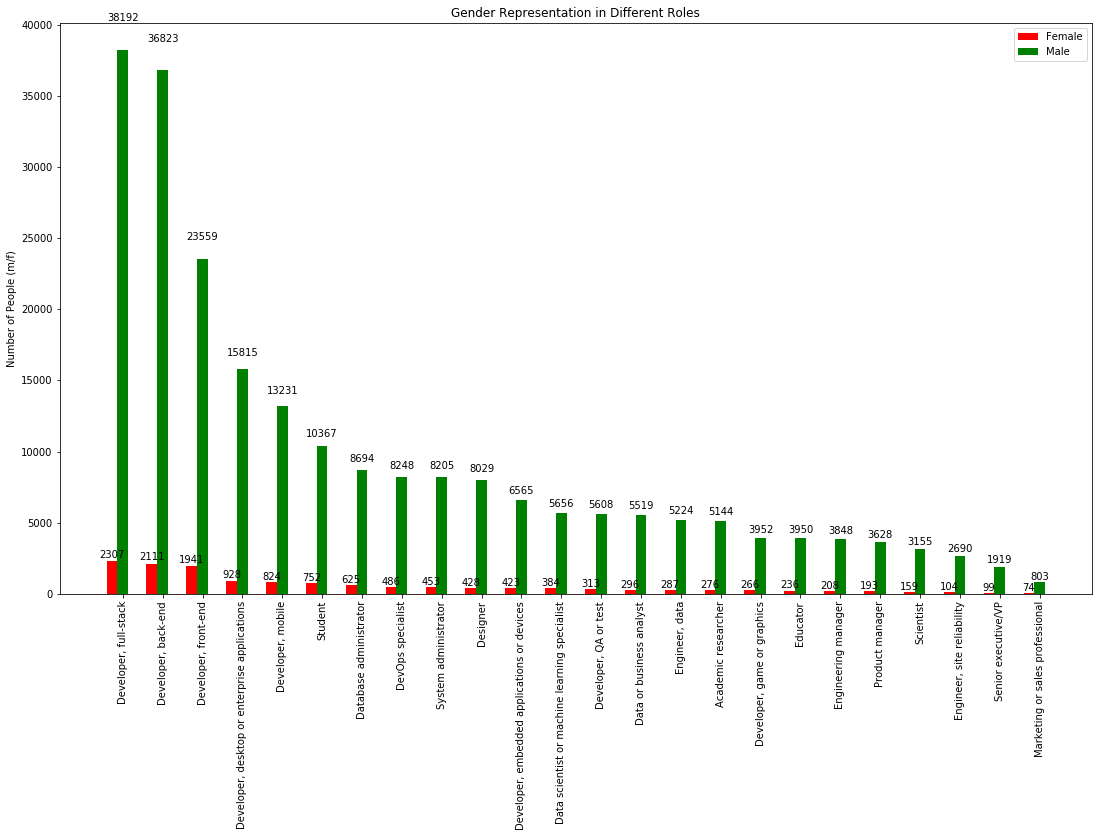

In [21]:
# visualising the data
compare_malefemale_disparity(female_dev_count, male_dev_count)

The above plots shows there is not a single IT profession where Women have more representation then men, infact the most reported 
dev profession (web developer) has almost than 90% difference in representation of Female Vs Male, almost same is the proportion difference  in Non-dev Roles

### Question: 4 What is the distribution of  women across different years since coding? how is it different from men?

In [22]:
# Data cleaning
survey_f_yearcode_notna = survey_female_distinct[survey_female_distinct.YearsCodePro.notna()]

In [23]:
# Assessing the data
print("The number of female IT professionals who didn't disclose years of coding", 
      survey_female_distinct['YearsCodePro'].isnull().sum())

The number of female IT professionals who didn't disclose years of coding 1175


In [24]:
def yearcode_tenyears(df_yearcode):
    '''Returns count of every 10 year counts in provided dataframe
    Args:
    df_yearcode : dataframe that contain count for each year
    Output:
    Dataframe with columns 'YearsExperience', 'count' to show count for each 10 year
    '''
    
    yearcode_count ={'upto 10 years':0, 'upto 20 years':0, 'upto 30 years':0, 
                     'upto 40 years':0,'upto 50 years':0, 'more than 50 years':0}
    
    for index, row in df_yearcode.iterrows():
        if row['index'] in ['Less than a year']:
            yearcode_count['upto 10 years']+= row['YearsCodePro']
        elif row['index'] in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']:
            yearcode_count['upto 10 years']+= row['YearsCodePro']
        elif row['index'] in ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20']:
            yearcode_count['upto 20 years']+= row['YearsCodePro']
        elif row['index'] in ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30']:
            yearcode_count['upto 30 years']+= row['YearsCodePro']
        elif row['index'] in ['31', '32', '33', '34', '35', '36', '37', '38', '39', '40']:
            yearcode_count['upto 40 years']+= row['YearsCodePro']
        elif row['index'] in ['41', '42', '43', '44', '45', '46', '47', '48', '49', '50']:
            yearcode_count['upto 50 years']+= row['YearsCodePro']
        elif row['index'] in ['More than 50 years']:
            yearcode_count['more than 50 years']+= row['YearsCodePro']
            
    return pd.DataFrame(yearcode_count.items(), columns=['YearsExperience', 'count'])
    

In [25]:
# Analysing the data
df_yearcode_f = survey_f_yearcode_notna['YearsCodePro'].value_counts().reset_index()
df_yearcode_f_count = yearcode_tenyears(df_yearcode_f)
df_yearcode_f_count

,YearsExperience,count
0,upto 10 years,3866
1,upto 20 years,583
2,upto 30 years,154
3,upto 40 years,40
4,upto 50 years,3
5,more than 50 years,3


In [26]:
# Analysing the data
survey_m_yearcode_notna = survey_male_distinct[survey_male_distinct.YearsCodePro.notna()]
print("The number of male IT professionals who didn't disclose years of coding", 
      survey_male_distinct['YearsCodePro'].isnull().sum())

The number of male IT professionals who didn't disclose years of coding 11921


In [27]:
# Analysing the data
df_yearcode_m = survey_m_yearcode_notna['YearsCodePro'].value_counts().reset_index()
df_yearcode_m_count = yearcode_tenyears(df_yearcode_m)
df_yearcode_m_count

,YearsExperience,count
0,upto 10 years,44865
1,upto 20 years,12857
2,upto 30 years,3739
3,upto 40 years,1096
4,upto 50 years,146
5,more than 50 years,34


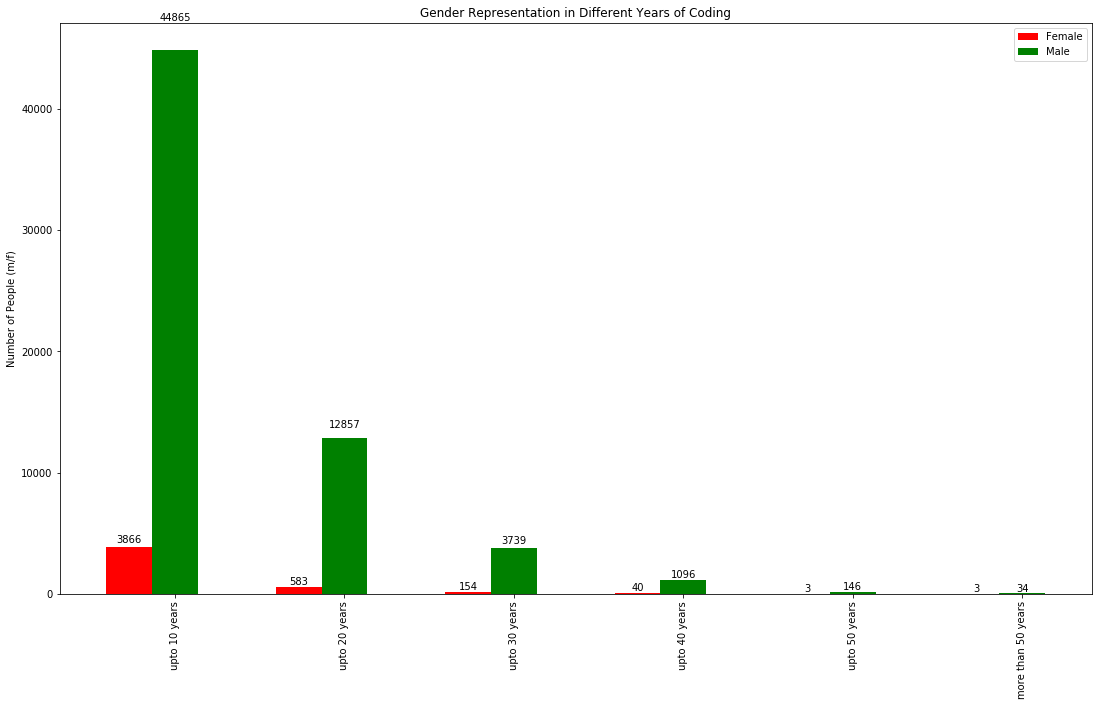

In [28]:
# Visualising Gender Representation in Different Years of Coding
df_yearcode_m_count = df_yearcode_m_count.set_index('YearsExperience')
df_yearcode_f_count = df_yearcode_f_count.set_index('YearsExperience')
compare_malefemale_disparity(df_yearcode_f_count, 
                             df_yearcode_m_count, title = "Gender Representation in Different Years of Coding" )

## Analysis from the above visualisation:
- Majority of Men and Women who took part in the survey have upto 10 year of coding experience.
- There are almost no woman  who took part in the survey that have coding experience of more than 40 years and very less for those who have more than 20 years of experience.